<a href="https://colab.research.google.com/github/Mnikito/4106/blob/main/ASL_Recognition/ASL_Test_MobileNetv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision import transforms
import numpy as np
import torch.nn as nn
import os
from PIL import Image

from torch import nn,optim
from torchvision import transforms, models ,datasets
import numpy as np
import matplotlib.pyplot as plt
import glob
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
model = models.mobilenet_v2(pretrained=False)

In [3]:
# define new classifier and append it to network but remember to have a 29-neuron output layer for our two classes.
model.classifier= nn.Sequential(nn.Dropout(p=0.6, inplace=False),
                                nn.Linear(in_features=1280, out_features=29, bias=True),
                                nn.LogSoftmax(dim=1))

#Define number of epochs through data and run the training loop
import math

In [6]:
user = "Mnikito"
repo = "4106"
src_dir = "ASL_Recognition"
pyfile = "MobileNetV2_ASL.pt"

url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src_dir}/{pyfile}"
!wget --no-cache --backups=1 {url}

--2022-05-11 21:48:13--  https://raw.githubusercontent.com/Mnikito/4106/main/ASL_Recognition/MobileNetV2_ASL.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9287565 (8.9M) [application/octet-stream]
Saving to: ‘MobileNetV2_ASL.pt’

MobileNetV2_ASL.pt  100%[===================>]   8.86M  --.-KB/s    in 0.03s   

2022-05-11 21:48:14 (336 MB/s) - ‘MobileNetV2_ASL.pt’ saved [9287565/9287565]



In [7]:
model.load_state_dict(torch.load("/content/MobileNetV2_ASL.pt"))
model.eval()

MobileNetV2(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05,

In [8]:
class_to_label = {
    0:"A",
    1:"B",
    2:"C",
    3:"D",
    4:"E",
    5:"F",
    6:"G",
    7:"H",
    8:"I",
    9:"J",
    10:"K",
    11:"L",
    12:"M",
    13:"N",
    14:"O",
    15:"P",
    16:"Q",
    17:"R",
    18:"S",
    19:"T",
    20:"U",
    21:"V",
    22:"W",
    23:"X",
    24:"Y",
    25:"Z",
    26:"delete",
    27:"nothing",
    28:"space",
}

In [9]:
#install torchvision and kaggle
!pip install torchvision
!pip install kaggle

In [10]:
# download dataset and extract it
! export KAGGLE_USERNAME="michealnikitin" && export KAGGLE_KEY="12287a73a5ea9f40a4901060014566ab" && kaggle datasets download --unzip amarinderplasma/alphabets-sign-language
! ls

 99% 2.02G/2.05G [00:57<00:01, 25.1MB/s]
100% 2.05G/2.05G [00:57<00:00, 38.0MB/s]
 asl_alphabet_1       asl_alphabet_valid        MobileNetV2_ASL.pt.1
 asl_alphabet_test   'MobileNetV2_ASL (1).pt'   sample_data
 asl_alphabet_train   MobileNetV2_ASL.pt


In [11]:
! pwd && ls
print("\nFolders(classess) in training folder: ...")
! cd asl_alphabet_1/asl_alphabet_train && ls

/content
 asl_alphabet_1       asl_alphabet_valid        MobileNetV2_ASL.pt.1
 asl_alphabet_test   'MobileNetV2_ASL (1).pt'   sample_data
 asl_alphabet_train   MobileNetV2_ASL.pt

Folders(classess) in training folder: ...
A  C  del  F  H  J  L  N	O  Q  S      T	V  X  Z
B  D  E    G  I  K  M  nothing	P  R  space  U	W  Y


In [12]:
%matplotlib inline

ASL=np.array(glob.glob('asl_alphabet_test/*')) 

In [13]:
import random

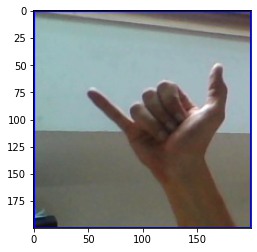

Predicted: Y

 Actual: 
Y_test.jpg


In [18]:
imgExtension = ["png", "jpeg", "jpg"] #Image Extensions to be chosen from
allImages = list()



def chooseRandomImage(directory="."):
    for img in os.listdir(directory): #Lists all files
        ext = img.split(".")[len(img.split(".")) - 1]
        if (ext in imgExtension):
            allImages.append(img)
    choice = random.randint(0, 27)
    chosenImage = allImages[choice] #Do Whatever you want with the image file
    return chosenImage

ASL=np.array(glob.glob('asl_alphabet_test/*'))

randomImage = chooseRandomImage("/content/asl_alphabet_test")
randomImagef = "/content/asl_alphabet_test/" + randomImage
img = plt.imread(randomImagef)

img_transform = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

plt.imshow(img)
plt.show()
img_t = img_transform(Image.fromarray(img))
input_img = img_t.view(1,3,224,224)

predict = model(input_img)
predict = int(torch.max(predict.data, 1)[1].numpy())

print("Predicted: " + class_to_label[predict])
print("\n Actual: ")
print(randomImage)